# Restaurant Reviews - Sentimental Analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
#make more space for text in dataframe 
pd.set_option('display.max_colwidth', 120) 

In [3]:
#get the reviews in a dataframe and take a look of the first 10 rows
data=pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0
8,The fries were great too.,1
9,A great touch.,1


'1' means that the costumer who made the review liked the place, while '0' means the opossite.

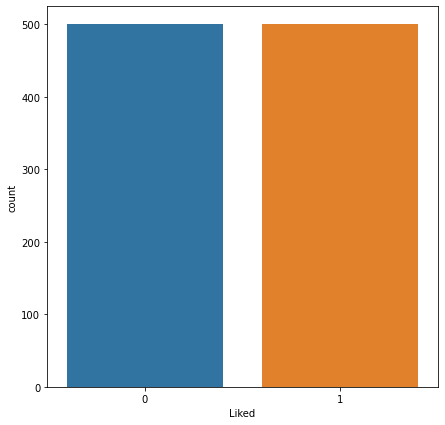

In [4]:
#let's plot how many costumers liked the restaurant and how many didn't like it.
plt.figure(figsize=(7, 7))
sns.countplot(x='Liked', data=data)
plt.show()

# Word Clouds

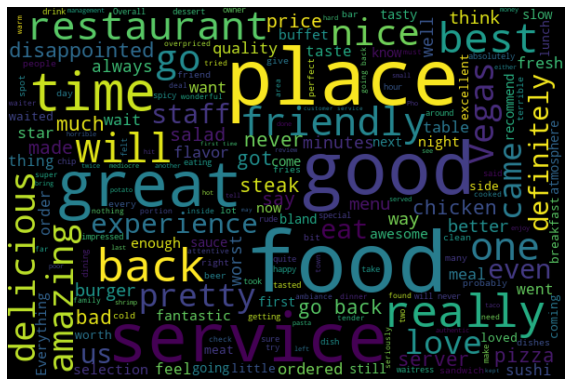

In [5]:
#plot the word cloud
allwords=' '.join([review for review in data['Review']])
wordcloud = WordCloud(width=600, height=400, random_state=21, max_font_size=90).generate(allwords)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
#split the dataframe into positive and negatative reviews
positive=data[data['Liked']==1]
negative=data[data['Liked']==0]

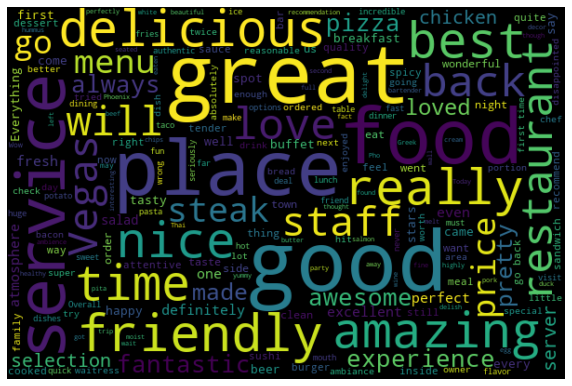

In [7]:
#plot the word cloud for positive reviews
allwords=' '.join([review for review in positive['Review']])
wordcloud = WordCloud(width=600, height=400, random_state=21, max_font_size=90).generate(allwords)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


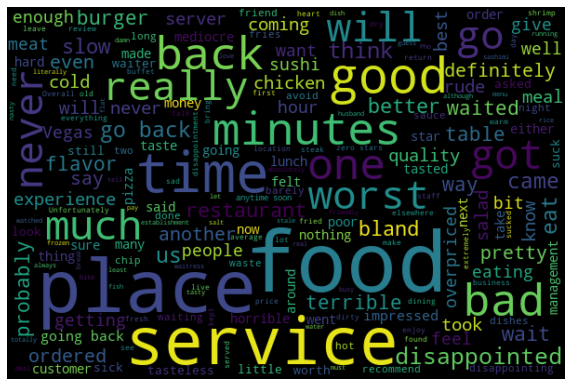

In [8]:
#plot the word cloud for negative reviews
allwords=' '.join([review for review in negative['Review']])
wordcloud = WordCloud(width=600, height=400, random_state=21, max_font_size=90).generate(allwords)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Subjectivity and Polarity

In [9]:
#create a fuction to get the subjectivity of the reviews and create a new column 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

data['Subjectivity']=data['Review'].apply(getSubjectivity)

In [10]:
#create a fuction to get the polarity of the reviews and create a new column 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

data['Polarity']=data['Review'].apply(getPolarity)

In [11]:
#take a look of the new rows
data.head(10)

,Review,Liked,Subjectivity,Polarity
0,Wow... Loved this place.,1,0.90,0.40
1,Crust is not good.,0,0.60,-0.35
2,Not tasty and the texture was just nasty.,0,1.00,-1.00
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,0.70,0.20
4,The selection on the menu was great and so were the prices.,1,0.75,0.80
5,Now I am getting angry and I want my damn pho.,0,1.00,-0.50
6,Honeslty it didn't taste THAT fresh.),0,0.50,0.30
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0,0.00,0.00
8,The fries were great too.,1,0.75,0.80
9,A great touch.,1,0.75,0.80


In [12]:
#create a fuction to get the analysis of the reviews based on the polarity
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
data['Analysis'] = data['Polarity'].apply(getAnalysis)

In [13]:
#show the 10 first rows of the data
data.head(10)

,Review,Liked,Subjectivity,Polarity,Analysis
0,Wow... Loved this place.,1,0.90,0.40,Positive
1,Crust is not good.,0,0.60,-0.35,Negative
2,Not tasty and the texture was just nasty.,0,1.00,-1.00,Negative
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,0.70,0.20,Positive
4,The selection on the menu was great and so were the prices.,1,0.75,0.80,Positive
5,Now I am getting angry and I want my damn pho.,0,1.00,-0.50,Negative
6,Honeslty it didn't taste THAT fresh.),0,0.50,0.30,Positive
7,The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.,0,0.00,0.00,Neutral
8,The fries were great too.,1,0.75,0.80,Positive
9,A great touch.,1,0.75,0.80,Positive


Positive    514
Negative    250
Neutral     236
Name: Analysis, dtype: int64


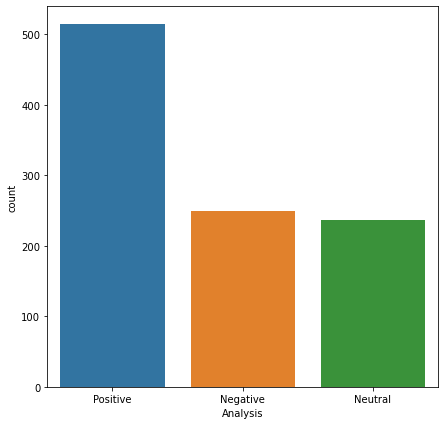

In [14]:
#plot how many positive, negative and neutral reviews there are
print(data['Analysis'].value_counts())

plt.figure(figsize=(7, 7))
sns.countplot(x='Analysis', data=data)
plt.show()

In [15]:
#print 10 positives reviews
data[data['Analysis']== 'Positive']['Review'].head(10)

0                                                                    Wow... Loved this place.
3     Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
4                                 The selection on the menu was great and so were the prices.
6                                                       Honeslty it didn't taste THAT fresh.)
8                                                                   The fries were great too.
9                                                                              A great touch.
10                                                                   Service was very prompt.
16                                                                        Highly recommended.
21                                                                         The food, amazing.
22                                                                      Service is also cute.
Name: Review, dtype: object

In [16]:
#print 10 negative reviews
data[data['Analysis']== 'Negative']['Review'].head(10)

1                                                                           Crust is not good.
2                                                    Not tasty and the texture was just nasty.
5                                               Now I am getting angry and I want my damn pho.
13                                I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!
14                              I was disgusted because I was pretty sure that was human hair.
15                                          I was shocked because no signs indicate cash only.
17                                                      Waitress was a little slow in service.
18                                         This place is not worth your time, let alone Vegas.
29                                                           The worst was the salmon sashimi.
37    Poor service, the waiter made me feel like I was stupid every time he came to the table.
Name: Review, dtype: object

In [17]:
#print 10 neutral reviews
data[data['Analysis']== 'Neutral']['Review'].head(10)

7     The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
11                                                                                                 Would not go back.
12                The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.
19                                                                                               did not like at all.
20                                                                                                The Burrittos Blah!
24                                                                                                 So they performed.
26                                                                         - They never brought a salad we asked for.
31                                                                                      This was like the final blow!
32                                                      

In [18]:
#finally, a pivot table to summarize what we learned
data.pivot_table(columns='Analysis', index='Liked', aggfunc='size')

Analysis,Negative,Neutral,Positive
Liked,,,
0,222,158,120
1,28,78,394
